In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from segmentacion.globalT import thresholdingGlobal
from formas_binarias import ErosionBin
from formas_binarias import etiquetas_c

In [3]:
imagen = cv2.imread('imagenesPruebas/Kmeans.png')
img = np.array(imagen)

In [4]:
print(img.shape)
imgRecortada = img[:580,:,:]

(963, 693, 3)


In [5]:
def rgb2grayInverse(rgb):
    return np.dot(rgb[..., :3], [0.114, 0.587, 0.299]).astype(np.uint8)

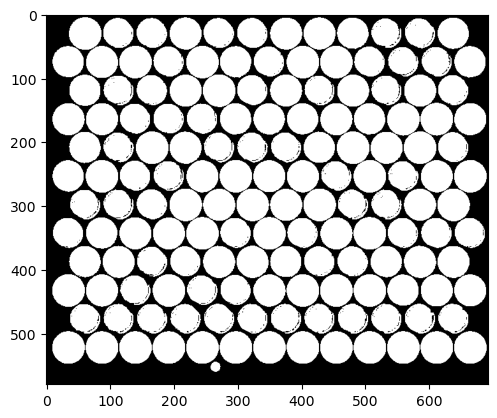

In [6]:
from segmentacion.bernsen import Bernsen
img = np.array(imgRecortada)
imggrayI= rgb2grayInverse(img)
globalX = thresholdingGlobal(imggrayI, 30)
globalXI = globalX
plt.imshow(globalXI, cmap ='gray')

[(243, 154, 178), (131, 157, 2), (231, 112, 164), (172, 146, 110), (191, 251, 103), (40, 171, 235), (162, 31, 211), (181, 181, 94), (225, 219, 128), (141, 182, 123), (39, 193, 242), (236, 199, 242), (241, 57, 248), (104, 211, 145), (160, 70, 106), (138, 9, 86), (235, 213, 27), (6, 154, 22), (96, 250, 18), (20, 96, 116), (116, 53, 232), (159, 175, 87), (167, 191, 211), (112, 117, 232), (209, 21, 184), (248, 30, 3), (3, 151, 180), (114, 186, 168), (69, 200, 237), (142, 225, 167), (99, 228, 122), (27, 36, 202), (82, 20, 176), (146, 114, 254), (8, 129, 15), (74, 168, 29), (125, 236, 212), (192, 175, 14), (38, 78, 58), (4, 25, 227), (147, 157, 198), (96, 205, 80), (219, 168, 48), (238, 230, 38), (202, 202, 225), (143, 234, 136), (244, 144, 29), (40, 71, 185), (52, 25, 5), (147, 195, 91), (168, 109, 180), (205, 55, 63), (235, 233, 201), (143, 125, 196), (168, 217, 192), (143, 123, 50), (147, 218, 104), (16, 130, 77), (80, 49, 219), (147, 152, 152), (221, 96, 237), (109, 102, 113), (51, 110, 

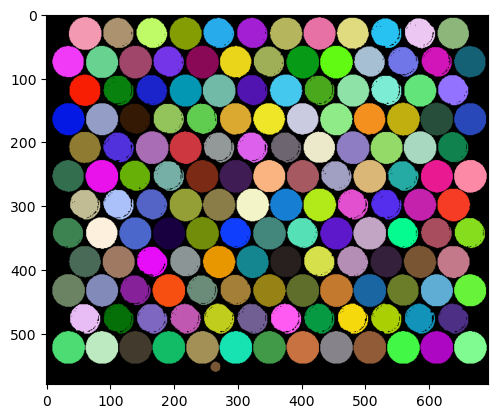

In [7]:
colors, numcolors = etiquetas_c(globalXI)
colors = np.array(colors)
plt.imshow(colors)
print(numcolors)
print(len(numcolors))

In [16]:
prom = np.zeros((len(numcolors), 3))
colors = np.array(colors)

for num in range(len(numcolors)):
    mask = np.all(colors == numcolors[num], axis=2)
    count = np.sum(mask)
    if count > 0:
        imgRecortada_masked = imgRecortada * mask[:, :, np.newaxis]
        prom[num, :3] = np.sum(imgRecortada_masked, axis=(0, 1)) / count

print(prom)
print(prom.shape)   

[[ 65.07184466 188.56796117 221.5092233 ]
 [200.83921371 175.41633065  37.83669355]
 [200.33132227 175.12770236  37.74962293]
 [208.43146327 109.21920185  37.4719491 ]
 [208.50836699 109.29717253  37.70859781]
 [208.75810185 109.46412037  37.70486111]
 [208.45250432 109.29245826  37.89925158]
 [181.89783593  52.68193256 174.8248616 ]
 [ 57.87124011 186.30870712  54.7176781 ]
 [ 57.81405177 185.93291072  54.88483888]
 [ 49.60681115  38.74055728 193.49597523]
 [ 49.36198547  38.83595642 192.08292978]
 [ 57.74841102 186.61069915  54.70762712]
 [182.49394551  52.76185671 175.66952573]
 [ 65.51385513 188.15848323 221.82936315]
 [ 65.51949318 188.86111111 222.40789474]
 [ 57.67247755 186.4923402   54.60116218]
 [ 65.46404276 188.37998056 221.52186589]
 [ 65.11143552 188.67542579 221.9459854 ]
 [ 57.67456556 186.07214323  54.63717746]
 [208.48491879 109.67807425  37.49651972]
 [208.66279745 109.6163668   37.43006384]
 [208.62867012 109.18595279  37.6488198 ]
 [ 49.92079208  39.09220297 193.52

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(prom)
labels = kmeans.labels_

d:\anaconda\settings\envs\primer\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\settings\envs\primer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)
ax.set_title("K-means Clustering on Swiss Roll Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

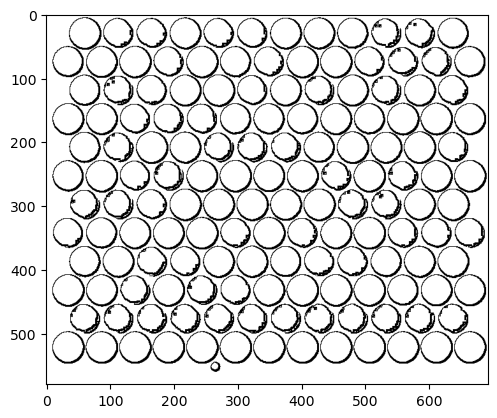

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion

def detectar_bordes_binarios(imagen_binaria):
    bordes = imagen_binaria - ErosionBin(imagen_binaria, 5)
    return bordes
bordes_detectados = detectar_bordes_binarios(globalXI)
plt.imshow(bordes_detectados, cmap ='binary')


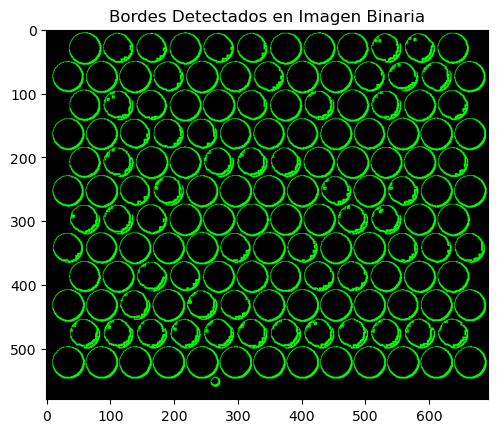

In [ ]:
canalVerde = np.zeros_like(bordes_detectados)
canalRojo = np.where(bordes_detectados == 1, 255, bordes_detectados)
CanalAzul = np.zeros_like(bordes_detectados)
matriz_visualizada = np.stack((canalVerde, canalRojo, CanalAzul), axis=-1)
plt.imshow(matriz_visualizada)
plt.title('Bordes Detectados en Imagen Binaria')
plt.show()

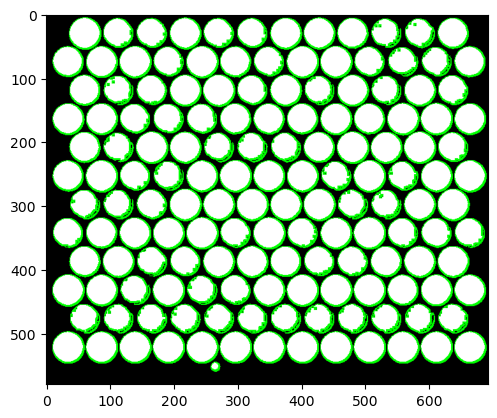

In [ ]:
combination = np.zeros_like(matriz_visualizada)  # Crea una matriz de ceros del mismo tamaño que globalX

for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        if globalXI[y, x] == 1:
            combination[y, x, :] =[255,255,255]
        else:
            combination[y, x, :] =[0,0,0]
        if (matriz_visualizada[y,x,1] == 255):
            combination[y, x, :] = matriz_visualizada[y,x,:]

plt.imshow(combination)
plt.show()

In [10]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def disEuclidian(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def centroidsRand(data, k):
    centroids = random.sample(data, k)
    return centroids

def AsignCentroids(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [disEuclidian(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def newCentroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def covergencia(old_centroids, new_centroids, tol=1e-4):
    return all(disEuclidian(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = centroidsRand(data, k)
    converged = False
    
    while not converged:
        clusters = AsignCentroids(data, centroids)
        new_centroids = newCentroids(clusters)
        converged = covergencia(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters

def plot_clusters(centroids, clusters):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar puntos y centroides
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        ax1.scatter(x, y, label=f'Cluster {i + 1}')

    centroids_x, centroids_y = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('K-Means Clustering')
    ax1.legend()
    ax1.grid(True)

def plot_clusters_3d(centroids, clusters):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111, projection='3d')

    for i, cluster in enumerate(clusters):
        x, y, z = zip(*cluster)
        ax1.scatter(x, y, z, label=f'Cluster {i + 1}')

    centroids_x, centroids_y, centroids_z = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, centroids_z, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('K-Means Clustering in 3D')
    ax1.legend()

    plt.show()

def calculate_inertia(k, clusters, centroids):
    total_inertia = 0
    for i in range(k):
        cluster_points = clusters[i]
        centroid = centroids[i]
        inertia_cluster = sum(disEuclidian(centroid, point) ** 2 for point in cluster_points)
        total_inertia += inertia_cluster
    return total_inertia


In [11]:
def KmeansComplete (datos, k):
    data_list = datos.tolist()
    centroids, clusters = k_means(data_list, k)    
    
    inertia = []
    for k in range(1, len(clusters) + 1):
        total_inertia = calculate_inertia(k, clusters, centroids)
        inertia.append(total_inertia)

    plot_clusters_3d(centroids, clusters)
  
    for i, centroid in enumerate(centroids):
        print(f"Centroide {i + 1}: {centroid}")
        print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(clusters) + 1), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Determinar k')
    plt.grid(True)
    plt.show()

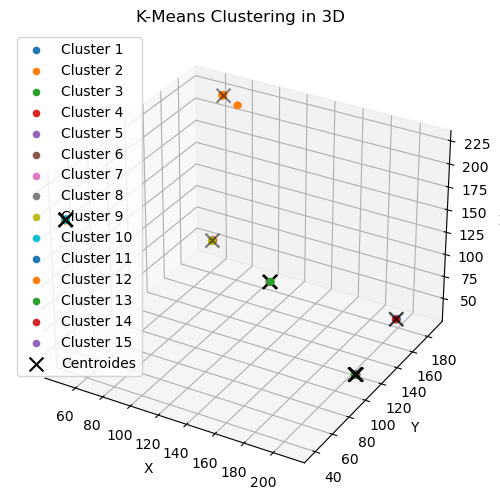

Centroide 1: [201.08023403209617, 175.63444898490263, 37.79758911070171]
Puntos en el cluster 1: [[201.36262626262626, 175.3959595959596, 37.9], [201.08732963149924, 175.7718324078748, 37.98990408884402], [201.13087417887823, 175.43203638201112, 37.92369883779687], [201.05316455696203, 175.85873417721518, 37.91139240506329], [201.12948912493678, 175.79514415781486, 37.61608497723824], [200.97579425113466, 175.48613212304588, 37.43368633383762], [200.83838383838383, 175.6727272727273, 37.62777777777778], [201.04747474747475, 175.5611111111111, 38.0040404040404], [201.0969696969697, 175.73636363636365, 37.77171717171717]]
Centroide 2: [49.37945601230733, 38.77881677725981, 192.59948160085588]
Puntos en el cluster 2: [[49.36198547215496, 38.83595641646489, 192.08292978208232], [49.398656898656895, 38.66910866910867, 192.85775335775335], [49.59684274438373, 38.92167577413479, 192.53612629022464], [49.47651006711409, 38.73764490543014, 192.81269066503967], [49.517304189435336, 38.9137826350

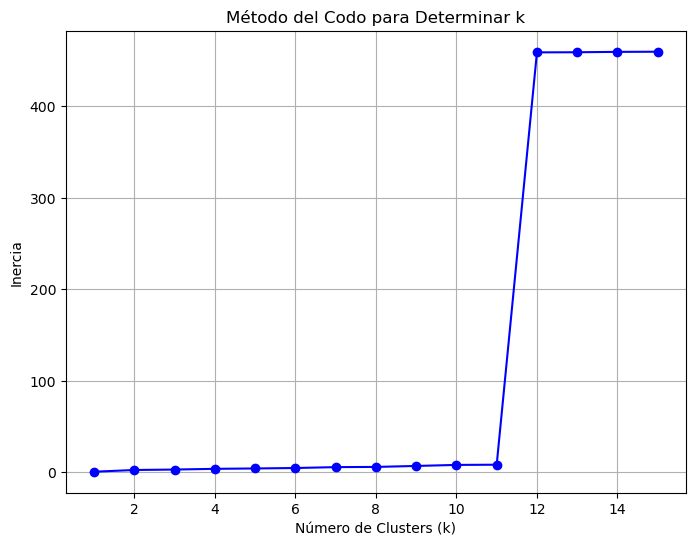

In [13]:
KmeansComplete(prom, 15)

In [ ]:
def kMeansCompleteIMG(IMG, k): 
    R, G, B = IMG[:, :, 0].reshape(-1, 1) , IMG[:, :, 1].reshape(-1, 1) , IMG[:, :, 2].reshape(-1, 1)
    nueva_matriz = np.column_stack((R, G, B))
    data_list = nueva_matriz.tolist()
    centroids, clusters = k_means(data_list, k)    
    
    inertia = []
    for k in range(1, len(clusters) + 1):
        total_inertia = calculate_inertia(k, clusters, centroids)
        inertia.append(total_inertia)

    plot_clusters_3d(centroids, clusters)
  
    for i, centroid in enumerate(centroids):
        print(f"Centroide {i + 1}: {centroid}")
        print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(clusters) + 1), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Determinar k')
    plt.grid(True)
    plt.show()

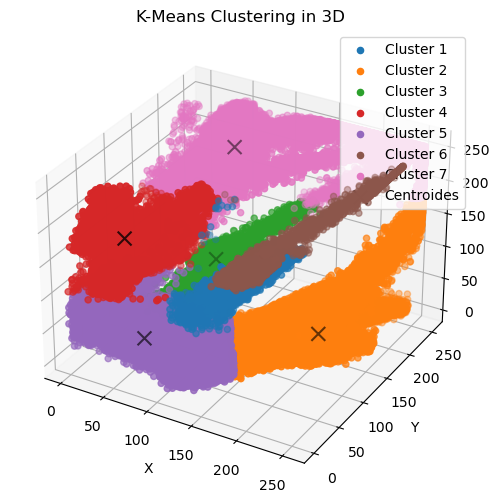

Centroide 1: [164.71179406651336, 58.1735741125007, 146.41108182379003]
Puntos en el cluster 1: [[118, 30, 94], [121, 29, 99], [122, 29, 103], [121, 30, 104], [121, 34, 102], [120, 37, 100], [118, 38, 94], [121, 31, 103], [139, 37, 117], [149, 38, 129], [157, 39, 140], [159, 36, 145], [160, 36, 149], [162, 36, 152], [159, 39, 152], [158, 42, 150], [159, 45, 146], [156, 48, 138], [151, 47, 127], [140, 40, 113], [132, 37, 103], [125, 37, 94], [110, 29, 99], [131, 36, 120], [149, 40, 140], [160, 38, 149], [167, 36, 155], [171, 32, 160], [172, 31, 166], [174, 28, 170], [172, 35, 169], [172, 38, 164], [170, 39, 158], [169, 41, 151], [166, 44, 143], [166, 49, 141], [154, 47, 130], [144, 46, 121], [131, 42, 109], [117, 37, 93], [124, 29, 113], [144, 31, 136], [167, 40, 161], [179, 39, 164], [172, 36, 156], [167, 40, 154], [160, 42, 148], [154, 43, 141], [142, 42, 129], [133, 42, 116], [119, 40, 98], [114, 27, 102], [140, 35, 132], [158, 35, 155], [172, 33, 169], [177, 37, 169], [168, 37, 163]

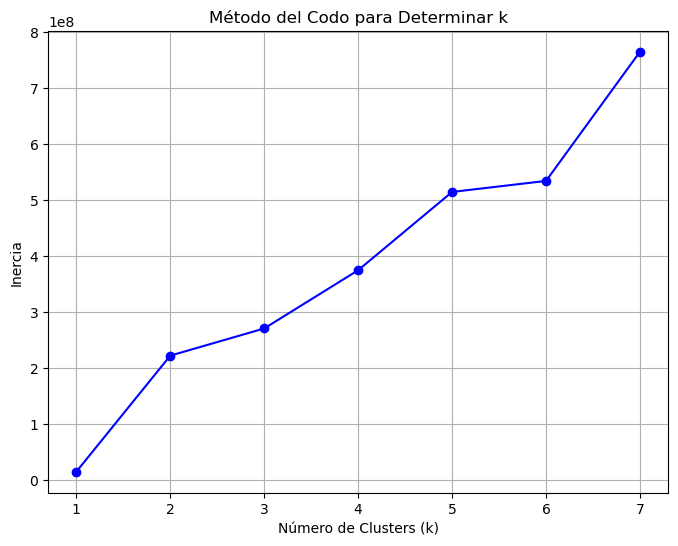

In [ ]:
kMeansCompleteIMG(imgRecortada, 7)